QUESTION 3
<hr>
Apply Data Pre-processing steps to uncover the factors that affect an Indian engineering graduate’s salary and subsequently select only relevant categories that have high impact on the salary. Clean the data such a way that it can be used by any regression algorithm to predict the salary.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [48]:
df = pd.read_csv("./Assets/Engineering_graduate_salary.csv")
df

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [49]:
df = df.drop( columns=["DOB", "Gender", "10board", "12board", "CollegeID", "Degree", "MechanicalEngg","ElectricalEngg",	"TelecomEngg",	"CivilEngg", "Specialization",
"CollegeCityID","CollegeCityTier",	"CollegeState", "ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "English", "ID", "12graduation" ] )
df

,10percentage,12percentage,CollegeTier,collegeGPA,GraduationYear,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,87.80,84.00,1,73.82,2013,665,810,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,57.00,64.50,2,65.00,2014,435,210,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,77.33,85.17,2,61.94,2011,475,505,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,84.30,86.00,1,80.40,2013,620,635,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,82.00,75.00,2,64.30,2012,495,365,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,75.00,73.00,2,70.00,2010,485,445,0.538387,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,84.00,77.00,2,75.20,2012,585,395,0.190153,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,91.40,65.56,2,73.19,2011,425,485,0.600057,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,88.64,65.16,2,74.81,2011,645,505,0.901490,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [50]:
df = df.truncate( after=20 )

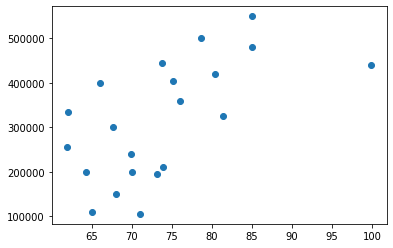

In [51]:
plt.scatter( df["collegeGPA"], df["Salary"] )
plt.show()

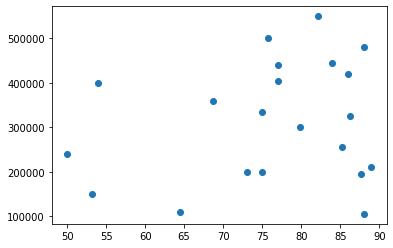

In [52]:
plt.scatter( df["12percentage"], df["Salary"] )
plt.show()

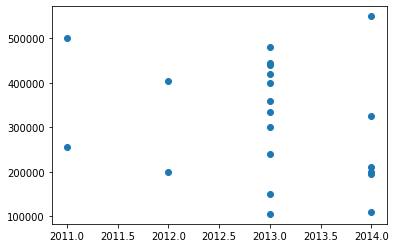

In [53]:
plt.scatter( df["GraduationYear"], df["Salary"] )
plt.show()

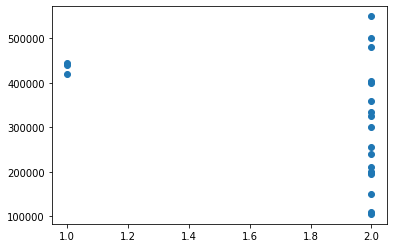

In [55]:
plt.scatter( df["CollegeTier"], df["Salary"] )
plt.show()

In [54]:
df.head

<bound method NDFrame.head of     10percentage  12percentage  CollegeTier  collegeGPA  GraduationYear  \
0          87.80         84.00            1       73.82            2013   
1          57.00         64.50            2       65.00            2014   
2          77.33         85.17            2       61.94            2011   
3          84.30         86.00            1       80.40            2013   
4          82.00         75.00            2       64.30            2012   
5          83.16         77.00            1       99.93            2013   
6          72.50         53.20            2       68.00            2013   
7          77.00         88.00            2       71.00            2013   
8          76.80         87.70            2       73.15            2014   
9          57.00         73.00            2       70.08            2014   
10         77.00         75.00            2       62.00            2013   
11         81.20         79.90            2       67.67            201